<a href="https://colab.research.google.com/github/deemmf/res_data/blob/main/Copy_of_Copy_of_ResFullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Installing required libraries**

In [1]:
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install unidecode
!{sys.executable} -m pip install pyarabic
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install nltk
!{sys.executable} -m pip install pyarabic
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install plotly
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install WordCloud
!{sys.executable} -m pip install TextBlob
!{sys.executable} -m pip install arabic-reshaper
!{sys.executable} -m pip install python-bidi
!pip install --upgrade arabic-reshaper
!python -m textblob.download_corpora


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 6.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 126 kB 6.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/sim

# **Import important libraries**

In [2]:
#utilities
import unidecode
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyarabic.araby as araby
import csv
import string
from datetime import datetime
import arabic_reshaper
from bidi.algorithm import get_display
from collections import Counter
#text processing & sentiment analysis
import re
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer # devide the words 
from collections import Counter #count the number of word for each list 
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from wordcloud import WordCloud
import unicodedata as ud
from nltk.stem.isri import ISRIStemmer
import time
#model
from textblob import TextBlob
from sklearn.metrics import classification_report, accuracy_score

%matplotlib inline


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
# change the setting of the cells to show the entire content of coulmn ( expand the size of coulmn)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


In [4]:
# Mounting Google Drive
from google.colab import drive  # to mount Google Drive to Colab notebook
drive.mount('/content/gdrive')
path='./gdrive/My Drive/Group1/Data_and_Code/'

# don't change this path
#path ='/content/gdrive/MyDrive/Data_and_Code/'

Mounted at /content/gdrive


In [5]:
!pwd

/content


In [6]:
# read csv file and save it in a data frame
data_df=pd.read_csv(path+'G1Dataset.csv') 
#data_df=pd.read_excel(path+'G1Dataset.xlsx') 


# **Exploring data before Preprocessing**

In [7]:
# how much data do I have?
len(data_df)

10970

In [8]:
# number of non-NA values
data_df.count()

Text         10970
Sentiment    10970
dtype: int64

In [9]:
# Print a concise summary of a DataFrame
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10970 entries, 0 to 10969
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       10970 non-null  object
 1   Sentiment  10970 non-null  object
dtypes: object(2)
memory usage: 171.5+ KB


In [10]:
#Generates descriptive statistics or Summary Statistic of the numeric columns
data_df.describe()

,Text,Sentiment
count,10970,10970
unique,10940,4
top,لذيذ,Positive
freq,7,7117


In [11]:
# Retrieve list of columns
data_df.columns

Index(['Text', 'Sentiment'], dtype='object')

In [12]:
data_df.head(10)

,Text,Sentiment
0,"Buona scelta gluten-free \nIl ristorante ""Il Grissino"" è un onesto ristorante la famiglia, senza troppe pretese e, coerentemente, con costi contenuti; caratteristiche che ne fanno un buon locale d'appoggio se si vuole mangiare fuori per comodità ma non si sta cercando l'evento memorabile. Tutte le portate sono più che discrete, il servizio cortese e ragionevolmente rapido. Fra i luoghi che fanno pizza senza glutine a Milano, le loro proposte (basate su farina DS) sono da contarsi fra le migliori. Raccomandabile per una cena tranquilla senza impegno.\n",Neutral
1,"Da evitare anche quello in via Pier della Francesca! \nSono stata all'Antica Focacceria in via Pier della Francesca 56 a Milano. Ho comprato arancini,caponata,sfincione. Li ho mangiati con un'amica. Risultato: ci è rimasto tutto sullo stomaco!! Una cosa tremenda!!! Siamo state malissimo! La caponata era immangiabile, veramente scadente. Gli arancini e lo sfincione non sembravano malvagi, ma evidentemente in questo locale non usano prodotti di qualità e non cambiano l'olio di cottura. Ci tengo a sottolineare che nè io nè la mia amica siamo dei tipi delicati, quindi non abbiamo problemi a mangiare fritti e cose del genere. Peccato perchè il locale (che tra l'altro non è a buon mercato) in sè è carino.",Neutral
2,تناولت العشاء فيه \nفندق قريب من المطار لكنه عادي في منطقه مزدحمة الطعام عادي اوبن بوفيه لكنه مقبول وكعادة اغلب الفنادق هنا الشيف كيني والاكل يغلب عليه الطابع الكيبني\n,Neutral
3,مطعم مختلف عن الجو العام بجوبا \nمطعم مختلف بسيط غير انيق ولكنه يقدم طعام مختلف يمكن تصنيفه بانه طعام هندي مقبول وهناك بعض الاصناف التي يمكن تناولها ولكن يغلب عليها البهار والحار والنكهه الهنديه الخدمه جيده ولكنه مزدحم وخاصة وقت العشاء\n,Neutral
4,مطعم لطيف يغلب عليه الطابع اليوناني لان مالكه اظن يوناني ولكن الطعام هندي اغلبه \nلطيف مزدحم دائما الطعام يتأخر نتيجه للزحام مفضل من الاجانب ولكنه كحال كل مطاعم جوبا مطعم بسيط وغالي جدا\n,Neutral
5,بيتزا ممتازة \nالشربة البحرية جيدة .. المكرونة عادية جدا .. البيتزا جدا ممتازة الجلسة والخدمة ممتازة ايضا بشكل عام لا اعتقد انني اعيد التجربة به\n,Neutral
6,"Self service a mezzogiorno non eccezionale ma prezzi abbastanza contenuti \nAbbiamo mangiato al self-service del ristorante. I prezzi sono medio-alti per un self service, ma i piatti sono mediamente più buoni. Magari non sono serviti sufficientemente caldi ma provano a servire piatti sfiziosi e abbastanza leggeri. La pizza è abbastanza buona. Non per pranzare tutti i giorni se si vuole risparmiare, per quello ci sono altri self-service in centro storico zona Via Indipendenza.\n",Neutral
7,مطعم جيد \nالمطعم جيد يتسم بالطابع الدمشقي القديم الطعام مقبول الخدمه جيده والتنظيم جيد ولكن سعر الطعام غالي بعض الشيئ\n,Neutral
8,الليجر \nجلسة هادئة ، خدمة متوسطة - الأكل جودتة فوق المتوسط - الشيشة جيدة\nتأخر قليل في توفير الخدمة\nالموسيقي والمطرب نوعا ما جيدة\n,Neutral
9,طعم مميز \nتوباز يقدم ماكولات هندية كيرلا بطعم لذيذ\nووجبات متعددة ، افضل ما عجبني فية الحبز البراتى الحار والخفيف\nوالبرياني حيدر اباد\nطريقة تقديمة للوجبات تقليدية\nيعني ممكن ينسى بجيب معلقة او صحن\nاو يحيك شايل كوب الشاي في ايدة من المطبخ\nكذا بعني يبغالة اتكيت افضل\nطبعا كل الماكولات تطبخ مثلجة مما قد يتسبب ببعض الاسهال الغير محمود\n,Neutral


In [13]:
data_df.tail(3)

,Text,Sentiment
10967,"""""""السلام عليكم ورحمة الله وبركاته \n \n فرع الملك عبدالعزيز 100% \n فرع خالد بن الوليد 90 % \n \n هذا تقييمي له .. وهو من أفضل المطاعم اللي أكلت فيها كبسة. \n أتمنى اللي يعرف مطاعم تطبخ بنفس طريقته يتحفنا فيها""""""\tPositive",Positive
10968,والله ياعيال اكلت منه / \n \n 1- همبرجر دجاج وكان جيد جدا .. \n 2- جربت اللحم ونوعا ما اعجبني .. \n 3- البطاطس بها نكهه ممتازه جدا .. \n 4-الاسعار جيده مع ارتفاع .. \n 5- الخدمه جيده جدا ما تطووول .. \n 6-الموقع الي جيته فى طريق الملك عبد الله فى مجمع التميمي الجديد \n \n -- \n \n فمان الكريم \n Mohammed AL Jeaid,Neutral
10969,المطعم في تراجع مستمر,Negative


# **check if there is missing value**



In [14]:
# Any missing values?
data_df.isnull().values.any()

False

In [15]:
# Total missing values for each feature
data_df.isnull().sum()

Text         0
Sentiment    0
dtype: int64

In [16]:
Sentiment= data_df.groupby(['Sentiment'])

In [17]:
Sentiment.describe()

Text         \
           count unique   
Sentiment                 
Irrelevant  203   203     
Negative    2591  2587    
Neutral     1059  1057    
Positive    7117  7097    

                                                                                                                                                                  \
                                                                                                                                                             top   
Sentiment                                                                                                                                                          
Irrelevant  منعتني الحمية \nللأسف لم أستطع التذوق من كنافة حبيبة مع أنني كنت أريد تجربيها و تجريب المدلوقة .... لكن للأسف الحمية كانت شديدة و لم أستطع التجربة\n   
Negative    لم يعجبني                                                                                                                                              
Neutral     عادي جدا                                                                                                                                               
Positive    لذيذ                                                                                                                                                   

                 
           freq  
Sentiment        
Irrelevant  1    
Negative    4    
Neutral     2    
Positive    5

# **Preprocess the text**



*issue 1: remove dublicate row (letters and records)*

In [18]:
# remove repeated letters
def remove_repeating_char(Text):
    return re.sub(r'(.)\1+', r'\1', Text)

In [19]:
# find duplicated rows that have same value in text column
data_df[data_df.duplicated(subset='Text')].head()

,Text,Sentiment
2794,"Tres Bonne creperie dans le Lot \nOuverte toute l'année, cette creperie se double d'un bar à bières avec plus de 100 variétés. Les crèpes sont copieuses, variées, les ingrédients de bonne qualité. Les prix sont extremements raisonnables. L'accueil est chaleureux. L'été, une terrasse très agréable permet de déjeuner ou diner sous la tonnelle. Seul bemol, il n'y a que des crèpes au froment (même les salées) et pas de galettes de sarrasin.",Positive
3308,احسن مطعم بيتزا عندي في العالم طعمه في البيتزا حلــــــــــــــــــــــــــــــــــــــــــــــــــــــــو,Positive
4481,لذيذ,Negative
4807,لذيذ,Neutral
5256,جيد,Negative


In [20]:
#remove duplicate reviews
data_df.drop_duplicates(subset='Text',inplace=True)

In [21]:
#check if duplicates were removed
data_df.duplicated(subset='Text').sum()

0

*Issue 2 : Remove Punctuations*

In [22]:
 # list of punctuation to be removed 

arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

#takes the text as an input and removes any punctuation added to it 
def remove_punctuations(Text):
  
  translator = str.maketrans('', '', punctuations_list)
  text =Text.translate(translator)
  text=' '.join(c for c in text.split())
  return text
 


*Issue 3 :Diacritical marks, Normalization**

In [23]:
# Removal of diacritics and arabic letters normalization
def normalize_arabic(Text):
    #remove diacritical marks 
    Text = araby.strip_diacritics(Text)
    Text = araby.strip_tashkeel(Text)

    #normalize arabic letters
    Text = araby.normalize_alef(Text)
    Text = araby.normalize_hamza(Text)
    Text = araby.normalize_ligature(Text)
    Text = re.sub("ة", "ه", Text)
    Text = re.sub("گ", "ك", Text)
    return Text

*Issue 4 : Remove StopWords*

In [24]:
ar_stops = set(stopwords.words('arabic'))
#remove stop_words
stop_words = {"،","","ياعيال","عندهم","اللي","ورحمة","وبركاته","عليكم","السلام","السياسة","آمينَ","آه","آهاً","فعلاً","أ","الساعه","أجل","أجمع","أخ","أخذ","أصبح","اسمهم","أقبل","أقل","أكثر","ألا","أم","أما","أمامك","اساسا","أمسى","أمّا","أن","أنا","أنت","أنتم","أنتما","أنتن","أنتِ","أنشأ","أنّى","أو","أوشك","أولئك","أولئكم","أولاء","أولالك","أوّهْ","أي","أيا","أين","أينما","أيّ","أَنَّ","أََيُّ","أُفٍّ","إذ","إذا","إذاً","إذما","إذن","إلى","إليكم","إليكما","إليكنّ","إليكَ","إلَيْكَ","إلّا","إمّا","إن","إنّما","إي","إياك","إياكم","إياكما","إياكن","إيانا","إياه","إياها","إياهم","إياهما","كلته","والمفترض","إيهٍ","إِنَّ","ا","نخليها","المالك","اجل","المفترض","اخرى","ارفقها","اذا","اربعة","ارتدّ","وراح","اطار","اعادة","اعلنت","اف","اكثر","صراحة","الألاء","الألى","الا","الاخيرة","الان","الاول","الاولى","التى","التي","الثاني","الثانية","بصراحة","الذى","الذي","الذين","السابق","الف","المهمه","اللاتي","للاسئله","يتغدى","يتعشى","برى","خلال","اللواتي","الماضي","المقبل","الوقت","الى","اليوم","اما","امام","امس","ان","انبرى","انقلب","انه","انها","او","اول","اي","العيد","ايام","ايضا","ب","زرناه","ايام","بان","بخٍ","برس","بسبب","بسّ","بشكل","بضع","يعني","بعد","بعض","بك","بكم","لمطعم","بكن","بل","بلى","بما","بماذا","بمن","بن","بنا","به","بها","بي","بيد","بين","بَسْ","بَلْهَ","بِئْسَ","تانِ","تانِك","تبدّل","تجاه","تحوّل","تلقاء","تلك","تلكم","تلكما","تم","تينك","تَيْنِ","تِه","تِي","ثلاثة","ثم","ثمّ","تجربتي","ثُمَّ","جعل","تجربه","جميع","جير","حار","حاشا","حاليا","حاي","حتى","حرى","حسب","حم","حوالى","حول","حيث","حيثما","حين","حيَّ","حَبَّذَا","حَتَّى","حَذارِ","خلا","خلال","دون","دونك","ذا","ذات","ذاك","ذانك","ذانِ","ذلك","ذلكم","ذلكما","مثل","ذو","ذوا","ذواتا","المطاعم","ذَيْنِ","ذِه","ذِي","راح","رجع","بحدود","اتوقع","الصحن","زيارة","سبحان","سرعان","سنة","سنوات","سوف","سوى","سَاءَ","سَاءَمَا","شبه","شخصا","شرع","شَتَّانَ","صار","صباح","صفر","ضمن","طاق","طالما","طفق","طَق","ظلّ","عاد","عام","عاما","عامة","عدا","عدة","عدد","عدم","عسى","عشر","عشرة","علق","على","عليك","عليه","عليها","علًّ","عن","عند","عندما","عوض","عين","ضمن","عَمَّا","غدا","مرحباا","ف","فان","فلان","فو","فى","في","فيم","فيما","فيه","فيها","قال","قام","قبل","قد","قطّ","قلما","قوة","كأنّما","كأين","كأيّ","كأيّن","كاد","كان","كانت","كذا","كذلك","كرب","كل","كلا","كلاهما","كلتا","كلم","كليكما","كليهما","كلّما","كلَّا","كم","كما","كي","كيت","كيف","اطلب","كَأَنَّ","كِخ","لئن","تحياتي","قائمة","لاسيما","تشكيله","لدى","اخذنا","لقاء","لك","لكم","اطلبه","لكن","المسا","لكي","جاي","ببساطه","بالعافية","لما","لمّا","فمان","لنا","له","لها","لو","قلت","لولا","كمان","لي","اخر","والشفاء","بالهناء","لَسْتُم","لَسْتُمَا","لَسْتُنَّ","لَسْتِ","لَسْنَ","لَعَلَّ","ل","لَيْتَ","ل","طلبت","وكمان","بتاريخ","لَيْسُوا","لَِسْنَا","فقط","ماانفك","وسط","مادام","ماذا","مازال","مره","الخلاصه","متى","مثل","موجوده","مساء","الانترنت","مقابل","مكانكم","انا","المطعم","مكانَك","شي","مليون","مما","ممن","من","منذ","منها","مه","مهما","مَنْ","مِن","نحن","نحو","نعم","نفس","نفسه","نهاية","نَخْ","نِعِمّا","نِعْمَ","ها","هاكَ","هاهنا","هبّ","هذا","هذه","هكذا","هل","بكل","هلّا","هم","هما","هن","هنا","هناك","هنالك","هو","هي","هيا","هيت","هيّا","هَؤلاء","هَاتانِ","هَاتَيْنِ","5-","هَاتِي","هَجْ","هذا","هَذانِ","هَذَيْنِ","هَذِه","هَذِي","و","وا","واحد","واضاف","واضافت","واكد","وان","مطاعم","واوضح","مطعم","وفي","وقال","وقالت","وقد","وقف","وكان","وكانت","فطنت","الكريم","ومن","مَن","وهو","وهي","الانترنت","وسوف","والله","يكون","يمكن","يوم","اقوم","بوصف","بصراحه","بالمطعم","ّفصحن"}
def remove_stop_words(Text):
    zen = TextBlob(Text)
    words = zen.words
    return " ".join([w for w in words if not w in ar_stops and not w in stop_words and len(w) >= 2])

*Issue 5 : Foreign words/reviews*‏

In [25]:
  import unicodedata
  def strip_accents(Text):
 return ''.join(Text for Text in unicodedata.normalize('NFD', Text)
                  if unicodedata.category(Text) != 'Mn')

*Issue 6 : Stemming*

In [26]:
from nltk.stem.isri import ISRIStemmer
from nltk.tokenize import word_tokenize


st = ISRIStemmer()

# Define a function
def stemming(word):
    wordsfilter=' '
    for a in word_tokenize(word):
        stem = st.stem(a)
        wordsfilter= wordsfilter + ' ' + stem
    return(wordsfilter)

# Call the function
#data_df['Stemming']= data_df["Clean Text"].apply(stemming)

In [27]:
#start processing the tweet
def processPost(Text):

   # remove punctuations 
    Text= remove_punctuations(Text)

    #renove stop_words
    Text= remove_stop_words(Text)
    
    # remove repeated letters
    Text= remove_repeating_char(Text)
  
    # remove Arabic stop words from the tweets
    Text = remove_stop_words(Text)
    
    #remove foreign words
    Text = strip_accents(Text)
    Text = re.sub(r'\s*[A-Za-z]+\b', ' ' , str(Text)).rstrip()
   
    # normalize the tweet
    Text = normalize_arabic(str(Text))

    # stemming: return the word to it root
    Text = stemming(Text)
    return Text

In [28]:
# apply the method in all the text and creat another cloumn with the processed text
data_df["Clean Text"] = data_df['Text'].apply(lambda x: processPost(x))

In [29]:
# check the new column
data_df.sample(10)

,Text,Sentiment,Clean Text
3972,افضل مطاعم البيتزا بالرياض,Positive,فضل يتز ريض
1171,الجزيرة الخضراء غلاء فاحش \nكون الموقع جميل على كورنيش جدة لايبرر ارتفاع أسعار المأكولات والمشروبات أسعار غير معقولة.\n,Negative,جزر خضراء غلء فحش كون وقع جمل كورنيش جده يبر رفع سعر اكل شرب سعر عقل
7984,"أكل المطعم بصفة عامة لذيذ .. ديكوراتهم جداً جميلة ,, اسعارهم معقوله \n انصح و بشدة اللي يحب الاكل الهندي انه يروح للمطعم",Positive,اكل بصف لذذ ديكور جدا جمل سعر عقل نصح بشد يحب اكل هند يرح
9589,عليهم صوصات رايقه وشغل نضيف وبرجر فايري وساندوشات حلوووووووووه ....,Positive,علي صوص ريق شغل نضف رجر فير دوش حله
5025,الصراحة اعجبني اكثر شيء الفطور مميز جدا وسعره مناسب,Negative,صرح عجب شيء فطر ميز جدا سعر نسب
4592,صحيح أن جده غير ! \n فرعهم هناك أفضل بشهادة من اقربائي \n \n فرع الرياض \n مافيه زياده! \n عادي ويمكن أقل \n الجلسه هناك مريحه وممتعه \n الديكور رائع \n اعجبني الفرع المقابل من جرير وفدركرز من ناحية الهدوء في وسط الأسبوع \n لكن بعض اكلاتهم تقطر زيت .. ما اجده أمر مقرف ! \n \n فرع الرياض أبل بيز لا بأس به,Negative,صحح جده فرع فضل شهد قرب فرع ريض افه زيد عدي ويم جلس ريح متع ديكور ريع عجب فرع قبل جرر دركرز نحي هدء سبع كلت قطر زيت اجد امر قرف فرع ريض ابل بيز باس
8311,سبايس في نظري من أسواء المطاعم الهندية لا من ناحية الأكل ولا من ناحية الخدمة ولا من ناحية النظافة و سبق بلغت عليه الأمانات وجدنا شعر بالآكل و الهندي يقول عادي شعرهـ وحده !! و من زين الترقيع جاب لنا شيف أقرع يقول كيف يجي شعر بالأكل !! مشكلة اللي ما يعترف بغلطته \n \n فيه اللي أفضل منه بكثييير ( مكاني ) جودة الآكل طيبة لكن الخدمه لك عليها و النظافة ماشفنا شي بأكله لكن الطاولات توحي لك انه مستهلك \n \n فيه برضوا ( الريف الهندي ) الأكل جودته ممتازة و الخدمة والنظافة ع أحسن ما يكون بس اسعارهم غويليه شويات مقارنه بمكاني وما شابهه,Negative,بيس نظر سوء هند نحي اكل نحي خدم نحي نظف سبق بلغ امن وجد شعر اكل هند يقل عدي شعر وحد زين رقع جاب شيف قرع يقل يجي شعر اكل شكل عرف غلط فضل كثر مكا جود اكل طيب خدم نظف اشف بكل طول توح هلك برض ريف هند اكل جود تزه خدم نظف احس سعر غول شوي قرن بمك شبه
1591,مطعم رائع واسعار مناسبة مذاق طيب مكان حلو \n شكرا جزيلا,Positive,ريع سعر نسب ذاق طيب كان حلو شكر جزل
10194,بااااايخ مرره صحيح شكله حلوو \n بس ذقت الباستا وعع الله يكرم النعمه بس ):,Negative,بيخ صحح شكل حلو ذقت بست وع اله كرم نعم
101,ممتاز \nبيتزا الإيطالي العظيم.\nكبيرة في الأسعار.\nنوعية ممتازة.\nجيد جدا بيتزا مارجريتا وكرات الأرز.\nأوصت لأولئك الذين يرغبون في تناول الطعام بشكل جيد وقضاء الحق\n,Positive,تاز يتز يطل عظم كبر سعر نوع تزه جيد جدا يتز مارجريتا وكر ارز اوص لول رغب نول طعم جيد قضء لحق


In [30]:
data_df['text length'] = data_df['Clean Text'].apply(len)

Understand the data


⭕⭕⭕⭕⭕⭕⭕⭕

In [31]:
tokenizer = RegexpTokenizer(r'\w+')
data_df["tokens"] = data_df["Clean Text"].apply(tokenizer.tokenize) 

In [32]:
data_df.tail(7)

,Text,Sentiment,Clean Text,text length,tokens
10963,صراحة ما شاء الله اول مره اتعشى منه امس كانت المناسبة عزومة للامير بدر بن عبدالمحسن,Positive,شاء اله تعش نسب عزم امر بدر عبدالمحسن,39,"[شاء, اله, تعش, نسب, عزم, امر, بدر, عبدالمحسن]"
10964,فية انواع رز لذيذة وفية عادي \n \n مندي الدجاج مره ناشف \n اللحم وسط \n اسعاره مرتفعة \n شكل الشواية يشهيك تطلب المحل كله,Positive,فيه واع رز لذذ وفه عدي ندي دجج نشف لحم سعر رفع شكل شيه يشه طلب محل كله,72,"[فيه, واع, رز, لذذ, وفه, عدي, ندي, دجج, نشف, لحم, سعر, رفع, شكل, شيه, يشه, طلب, محل, كله]"
10965,لا بأس به,Neutral,باس,5,[باس]
10966,جربته 3 مرات \n الاكل ممتاز الكميات وفيرة الخدمة جيدة \n نظافة المكان يتم تنظيفه قبل دخول زبائن جديدة \n وساكرر الزيارة,Positive,جرب رات اكل تاز كمي وفر خدم جيد نظف كان يتم نظف دخل زبا جدد سكر زير,69,"[جرب, رات, اكل, تاز, كمي, وفر, خدم, جيد, نظف, كان, يتم, نظف, دخل, زبا, جدد, سكر, زير]"
10967,"""""""السلام عليكم ورحمة الله وبركاته \n \n فرع الملك عبدالعزيز 100% \n فرع خالد بن الوليد 90 % \n \n هذا تقييمي له .. وهو من أفضل المطاعم اللي أكلت فيها كبسة. \n أتمنى اللي يعرف مطاعم تطبخ بنفس طريقته يتحفنا فيها""""""\tPositive",Positive,اله فرع ملك عبدالعزيز 10 فرع خلد ولد 90 تقم فضل اكل كبس اتم عرف طبخ نفس طرق تحف,81,"[اله, فرع, ملك, عبدالعزيز, 10, فرع, خلد, ولد, 90, تقم, فضل, اكل, كبس, اتم, عرف, طبخ, نفس, طرق, تحف]"
10968,والله ياعيال اكلت منه / \n \n 1- همبرجر دجاج وكان جيد جدا .. \n 2- جربت اللحم ونوعا ما اعجبني .. \n 3- البطاطس بها نكهه ممتازه جدا .. \n 4-الاسعار جيده مع ارتفاع .. \n 5- الخدمه جيده جدا ما تطووول .. \n 6-الموقع الي جيته فى طريق الملك عبد الله فى مجمع التميمي الجديد \n \n -- \n \n فمان الكريم \n Mohammed AL Jeaid,Neutral,اكل همبرجر دجج جيد جدا جرب لحم ونع عجب ططس نكه تزه جدا 4الاسعار جيد رفع خدم جيد جدا تطل 6الموقع الي جيت طرق ملك عبد اله جمع تمم جدد,133,"[اكل, همبرجر, دجج, جيد, جدا, جرب, لحم, ونع, عجب, ططس, نكه, تزه, جدا, 4الاسعار, جيد, رفع, خدم, جيد, جدا, تطل, 6الموقع, الي, جيت, طرق, ملك, عبد, اله, جمع, تمم, جدد]"
10969,المطعم في تراجع مستمر,Negative,رجع سمر,9,"[رجع, سمر]"


# **Creating the dataframes**

In [33]:
from pandas.core.arrays.categorical import contains


#filter sub dataframe from data_df dataframe

data_df1=data_df[data_df['Clean Text'].str.contains('نظف')]

data_df2=data_df[data_df['Clean Text'].str.contains('نظم')]

data_df3=data_df[data_df['Clean Text'].str.contains('رتب')]

data_df4=data_df[data_df['Clean Text'].str.contains('وسخ')]

#concat the dataframes into a single dataframe clean_df
frames = [data_df1,data_df2,data_df3,data_df4]

clean_df = pd.concat(frames)

In [34]:
#checking the df values after concat them
clean_df.head()

,Text,Sentiment,Clean Text,text length,tokens
14,مطعم متوسط \nمأكولات هندية والاكل تقريبا جميعه غير طازج ... غير ان المكان نظيف ... وشوربة العدس لذيذه ... اللحوم والاسماك والدجاج كله مجمد ولا طعم له\n,Neutral,توسط اكل هند اكل قرب جمع طزج كان نظف شورب عدس لذذ حوم سمك دجج كله جمد طعم,75,"[توسط, اكل, هند, اكل, قرب, جمع, طزج, كان, نظف, شورب, عدس, لذذ, حوم, سمك, دجج, كله, جمد, طعم]"
15,مطعم عادي جدا \nمطعم عادي ومستواه متوسط ... يقدم الاسماك بطريقتين احدهما الشوي على الفحم بدون بهارات والاخرى طاجن في الفرن ببهارات خفيفة ... لم تعجبني كثيرا طريقة شوي الاسماك حيث لاتوجد خلطة او تتبيلة مميزه خاصة بالمطعم وذات الحال بالنسبه للروبيان والحبار واللوبستر ... مايميزه هو أن الاسماك طازجه فقط ... الخبز لذيذ على الطريقه التركية والمقبلات نوعا ما مقبوله لاكنها ليست بجودة المفبلات اللبنانية ... نظافة المطعم متوسطه والخدمه كذلك متوسطه\n,Neutral,عدي جدا عدي ستو توسط قدم سمك طرق احد شوي فحم بدن بهر اخر طجن فرن بهر خفف عجب طرق شوي سمك وجد خلط تبل يزه وذت حال نسب لرب حبر ستر مايميز سمك طزج خبز لذذ طرق ركه قبل نوع قبل لكن بجد فبل بنن نظف توسط خدم توسط,207,"[عدي, جدا, عدي, ستو, توسط, قدم, سمك, طرق, احد, شوي, فحم, بدن, بهر, اخر, طجن, فرن, بهر, خفف, عجب, طرق, شوي, سمك, وجد, خلط, تبل, يزه, وذت, حال, نسب, لرب, حبر, ستر, مايميز, سمك, طزج, خبز, لذذ, طرق, ركه, قبل, نوع, قبل, لكن, بجد, فبل, بنن, نظف, توسط, خدم, توسط]"
16,نكهة الطعام ليست جيدة \nنكهة الطعام غريبة ، ليست لبنانية ولا سورية ولا فلسطينية . لم يعجبني لانكهة ولارائحة ولا طعم الطعام، غير ذلك الخدمة جيدة والموقع جيد والنظافة جيدة\n,Neutral,نكه طعم جيد نكه طعم غرب لبن سور فلسطينيه عجب لنك ولارايحه طعم طعم خدم جيد وقع جيد نظف جيد,91,"[نكه, طعم, جيد, نكه, طعم, غرب, لبن, سور, فلسطينيه, عجب, لنك, ولارايحه, طعم, طعم, خدم, جيد, وقع, جيد, نظف, جيد]"
18,عادي \nخدمه سيئه\nالاكل عادي والنظافه وسط\nيتأخر الاكل كثيرا وخصوصا مساء وفي حال تواجد العديد من الزبائن او وقت متاخر\n,Neutral,عدي خدم سيه اكل عدي نظف تخر اكل خصص حال وجد عدد زبا وقت تخر,61,"[عدي, خدم, سيه, اكل, عدي, نظف, تخر, اكل, خصص, حال, وجد, عدد, زبا, وقت, تخر]"
22,٦٠ \nاللي يوصل ميلان ولا يمر هالمطعم اعتبرة خسران خسران مطعم مرتب اكل نظيف ولذيذ جداً و العاملين محترمين انا صراحة بدون مجاملة اعطي المطعم ٩٩،٩/١٠٠,Positive,٦٠ وصل ميل يمر هالمطعم عبر خسر خسر رتب اكل نظف لذذ جدا عمل حرم بدن جمل اعط ٩١٠,80,"[٦٠, وصل, ميل, يمر, هالمطعم, عبر, خسر, خسر, رتب, اكل, نظف, لذذ, جدا, عمل, حرم, بدن, جمل, اعط, ٩١٠]"


In [35]:
len(clean_df)

1810

# visualization:Customers opinion sentiment

In [36]:
# count the number of sentiments 
texts_by_Sentiment_cln = clean_df['Sentiment'].value_counts()

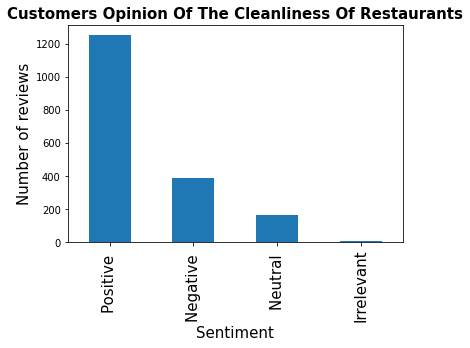

In [37]:
# visualize the results using bar chart
fig, ax = plt.subplots()

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)

ax.set_xlabel('Sentiment', fontsize=15)
ax.set_ylabel('Number of reviews' , fontsize=15)
ax.set_title('Customers Opinion Of The Cleanliness Of Restaurants', fontsize=15, fontweight='bold')

texts_by_Sentiment_cln[:4].plot(ax=ax, kind='bar')

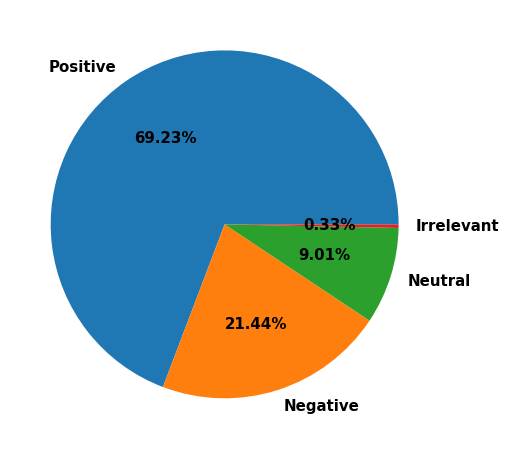

In [38]:

#visualize the results using Pie Chart

plt.figure(figsize=[9,8]);
Labels=['Positive','Negative','Neutral','Irrelevant']
plt.pie(texts_by_Sentiment_cln,labels=Labels,autopct='%1.2f%%',textprops={'fontsize':15,'weight':'bold'})
plt.show()

# visualization:Most positive words

In [39]:
# change values to numeric
data_df['Sentiment'] = data_df['Sentiment'].map({'Positive ': 0, 'Negative ': 1}) 

In [40]:
positive_df= data_df[data_df['Sentiment']==0]

words_count=Counter(" ".join(positive_df['Clean Text']).split())
words_count.most_common(15)

[('جدا', 3241),
 ('اكل', 2903),
 ('طعم', 2749),
 ('ريع', 2228),
 ('سعر', 2222),
 ('لذذ', 2067),
 ('خدم', 1887),
 ('جرب', 1746),
 ('فضل', 1676),
 ('طلب', 1462),
 ('كان', 1447),
 ('جمل', 1376),
 ('جيد', 1337),
 ('تاز', 1250),
 ('قدم', 1249)]

In [41]:
#stop words
#ar_stops = set(stopwords.words('arabic'))
ignore = {"عدي","سيء","طول","قبل","ريح","سيه","برد","بعد","عند" ,"ابد","نظر","كنت","رجر","وحد","علي","يتز","اقل","طبع","كان","اني","مو","شوي","غلي","زير","نسب","جدا","طلب","نسب"}
for word in ignore:
  if word in words_count:
    del words_count[word]

In [42]:
words_count.most_common(15)

[('اكل', 2903),
 ('طعم', 2749),
 ('ريع', 2228),
 ('سعر', 2222),
 ('لذذ', 2067),
 ('خدم', 1887),
 ('جرب', 1746),
 ('فضل', 1676),
 ('جمل', 1376),
 ('جيد', 1337),
 ('تاز', 1250),
 ('قدم', 1249),
 ('طبق', 1205),
 ('نظف', 1139),
 ('وجب', 1098)]

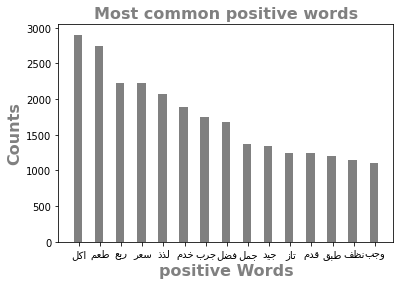

In [43]:
from matplotlib import colorbar
import numpy as np
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display

common_positive_words =  words_count.most_common(15)

words, counts = zip(*common_positive_words)  
index = np.arange(len(common_positive_words))  

words = list(words) # convert to a mutable list

for i in range(len(words)):
    words[i] = get_display(arabic_reshaper.reshape(words[i]))

fig, ax = plt.subplots()


ax.tick_params(axis='x',labelsize=10)
ax.tick_params(axis='y',labelsize=10)
ax.set_xlabel('index',fontsize=16,color='gray',fontweight='bold')
ax.set_ylabel('counts',fontsize=16, color='gray',fontweight='bold')

color=['gray']


ax.set_ylabel('Counts')
ax.set_xlabel('positive Words')
ax.set_xticks(index+0.4/8.)
ax.set_xticklabels(words)
ax.set_title("Most common positive words",fontsize=16,fontweight='bold', color='gray')

bar = ax.bar(index, counts, 0.4,color=color)

plt.show()




# visualization:Most negative words

In [44]:
neagtive_df= data_df[data_df['Sentiment']==1]

words_count=Counter(" ".join(neagtive_df['Clean Text']).split())
words_count.most_common(15)

[('اكل', 1230),
 ('جدا', 1172),
 ('طعم', 1095),
 ('طلب', 991),
 ('سعر', 885),
 ('خدم', 638),
 ('جرب', 620),
 ('عمل', 490),
 ('فرع', 482),
 ('دجج', 451),
 ('عدي', 444),
 ('جيد', 421),
 ('وجب', 408),
 ('فضل', 398),
 ('قدم', 385)]

In [45]:
#stop words
#ar_stops = set(stopwords.words('arabic'))
ignore = {"لذذ","مره","اخر","جلس","كان","وجد","قدم","لسف","دجج","عمل","فضل","كثر","نسب","فرع","جرب","طلب","وجب","جدا","دخل","اله","نصح","قبل","الي","وحد","برد","بعد","عجب","نوع","يتز","عند","ابد","نظر","رجر","جود","كنت","خبز"}
for word in ignore:
  if word in words_count:
    del words_count[word]
 

In [46]:
 words_count.most_common(15)

[('اكل', 1230),
 ('طعم', 1095),
 ('سعر', 885),
 ('خدم', 638),
 ('عدي', 444),
 ('جيد', 421),
 ('نظف', 381),
 ('طبق', 357),
 ('طول', 342),
 ('سيه', 334),
 ('لحم', 322),
 ('شكل', 309),
 ('سيء', 288),
 ('ريح', 245),
 ('اقل', 207)]

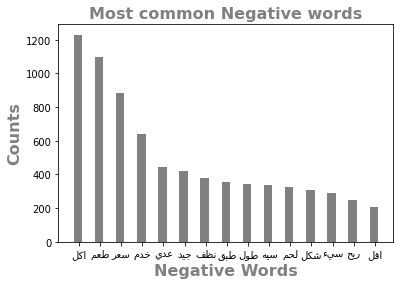

In [47]:
from matplotlib import colorbar
import numpy as np
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display

common_negative_words =  words_count.most_common(15)
words, counts = zip(*common_negative_words)  
index = np.arange(len(common_negative_words))  

words = list(words) # convert to a mutable list

for i in range(len(words)):
    words[i] = get_display(arabic_reshaper.reshape(words[i]))

fig, ax = plt.subplots()
ax.tick_params(axis='x',labelsize=10)
ax.tick_params(axis='y',labelsize=10)
ax.set_xlabel('index',fontsize=16,color='gray',fontweight='bold')
ax.set_ylabel('counts',fontsize=16, color='gray',fontweight='bold')

color=['gray']
ax.set_ylabel('Counts')
ax.set_xlabel('Negative Words')
ax.set_xticks(index+0.4/8.)
ax.set_xticklabels(words)
ax.set_title("Most common Negative words",fontsize=16,fontweight='bold', color='gray')

bar = ax.bar(index, counts, 0.4,color=color)

plt.show()

# **Understand the data before and after Preprocessing**

before Preprocessing:

In [48]:
# unCleaned tokens
tokenizer = RegexpTokenizer(r'\w+')
data_df["unCleaned tokens"] = data_df["Text"].apply(tokenizer.tokenize) 

unCleaned_all_words = [word for tokens in data_df["unCleaned tokens"] for word in tokens]
unCleaned_sentence_lengths = [len(tokens) for tokens in data_df["unCleaned tokens"]]

VOCAB = sorted(list(set(unCleaned_all_words)))

print("%s words total, with a vocabulary size of %s" % (len(unCleaned_all_words), len(VOCAB)))
print("Max sentence length is %s" % max(unCleaned_sentence_lengths))

424449 words total, with a vocabulary size of 56010
Max sentence length is 787


In [49]:
# count the number of unCleaned words
unCleaned_word_counter = Counter(unCleaned_all_words)
# show the most common unCleaned words
unCleaned_word_counter.most_common(10)

[('من', 9250),
 ('في', 7163),
 ('و', 5647),
 ('المطعم', 4902),
 ('جدا', 4618),
 ('على', 3286),
 ('مطعم', 2963),
 ('ما', 2917),
 ('مع', 2237),
 ('كان', 1950)]

In [50]:
# Display 10 least common unCleaned lines
unCleaned_word_counter.most_common()[-10:]

[('إزالتها', 1),
 ('للأيادي', 1),
 ('استبدلنا', 1),
 ('نظاقة', 1),
 ('للامير', 1),
 ('يشهيك', 1),
 ('تنظيفه', 1),
 ('وساكرر', 1),
 ('يتحفنا', 1),
 ('Positive', 1)]

In [51]:
# store the top 20 unCleaned words in a new data frame
ulst = unCleaned_word_counter.most_common(20)
unCleaned_word_df = pd.DataFrame(ulst, columns = ['unCleaned Word', 'Count'])
unCleaned_word_df.head()

,unCleaned Word,Count
0,من,9250
1,في,7163
2,و,5647
3,المطعم,4902
4,جدا,4618


after Preprocessing:

In [52]:
all_words = [word for tokens in data_df["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in data_df["tokens"]]

VOCAB = sorted(list(set(all_words)))

print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

301128 words total, with a vocabulary size of 12624
Max sentence length is 600


In [53]:
# count the number of words
word_counter = Counter(all_words)

In [54]:
# show the most common words
word_counter.most_common(10)

[('جدا', 4951),
 ('اكل', 4576),
 ('طعم', 4282),
 ('سعر', 3585),
 ('خدم', 2848),
 ('طلب', 2796),
 ('جرب', 2623),
 ('ريع', 2522),
 ('لذذ', 2499),
 ('فضل', 2285)]

In [55]:
# Display 10 least common lines
word_counter.most_common()[-10:]

[('64', 1),
 ('وايتريسز', 1),
 ('وفردريكرز', 1),
 ('عرفع', 1),
 ('هالعوامل', 1),
 ('ومايمديك', 1),
 ('سبيلوموزاريلا', 1),
 ('استروبري', 1),
 ('رصي', 1),
 ('حيتاخر', 1)]

In [56]:
# store the top 20 words in a new data frame
lst = word_counter.most_common(20)
word_df = pd.DataFrame(lst, columns = ['Word', 'Count'])

In [57]:
word_df.head()

,Word,Count
0,جدا,4951
1,اكل,4576
2,طعم,4282
3,سعر,3585
4,خدم,2848


In [58]:
data_df.head(5)

,Text,Sentiment,Clean Text,text length,tokens,unCleaned tokens
0,"Buona scelta gluten-free \nIl ristorante ""Il Grissino"" è un onesto ristorante la famiglia, senza troppe pretese e, coerentemente, con costi contenuti; caratteristiche che ne fanno un buon locale d'appoggio se si vuole mangiare fuori per comodità ma non si sta cercando l'evento memorabile. Tutte le portate sono più che discrete, il servizio cortese e ragionevolmente rapido. Fra i luoghi che fanno pizza senza glutine a Milano, le loro proposte (basate su farina DS) sono da contarsi fra le migliori. Raccomandabile per una cena tranquilla senza impegno.\n",NaN,,1,[],"[Buona, scelta, gluten, free, Il, ristorante, Il, Grissino, è, un, onesto, ristorante, la, famiglia, senza, troppe, pretese, e, coerentemente, con, costi, contenuti, caratteristiche, che, ne, fanno, un, buon, locale, d, appoggio, se, si, vuole, mangiare, fuori, per, comodità, ma, non, si, sta, cercando, l, evento, memorabile, Tutte, le, portate, sono, più, che, discrete, il, servizio, cortese, e, ragionevolmente, rapido, Fra, i, luoghi, che, fanno, pizza, senza, glutine, a, Milano, le, loro, proposte, basate, su, farina, DS, sono, da, contarsi, fra, le, migliori, Raccomandabile, per, una, cena, tranquilla, senza, impegno]"
1,"Da evitare anche quello in via Pier della Francesca! \nSono stata all'Antica Focacceria in via Pier della Francesca 56 a Milano. Ho comprato arancini,caponata,sfincione. Li ho mangiati con un'amica. Risultato: ci è rimasto tutto sullo stomaco!! Una cosa tremenda!!! Siamo state malissimo! La caponata era immangiabile, veramente scadente. Gli arancini e lo sfincione non sembravano malvagi, ma evidentemente in questo locale non usano prodotti di qualità e non cambiano l'olio di cottura. Ci tengo a sottolineare che nè io nè la mia amica siamo dei tipi delicati, quindi non abbiamo problemi a mangiare fritti e cose del genere. Peccato perchè il locale (che tra l'altro non è a buon mercato) in sè è carino.",NaN,56,4,[56],"[Da, evitare, anche, quello, in, via, Pier, della, Francesca, Sono, stata, all, Antica, Focacceria, in, via, Pier, della, Francesca, 56, a, Milano, Ho, comprato, arancini, caponata, sfincione, Li, ho, mangiati, con, un, amica, Risultato, ci, è, rimasto, tutto, sullo, stomaco, Una, cosa, tremenda, Siamo, state, malissimo, La, caponata, era, immangiabile, veramente, scadente, Gli, arancini, e, lo, sfincione, non, sembravano, malvagi, ma, evidentemente, in, questo, locale, non, usano, prodotti, di, qualità, e, non, cambiano, l, olio, di, cottura, Ci, tengo, a, sottolineare, che, nè, io, nè, la, mia, amica, siamo, dei, tipi, delicati, quindi, non, abbiamo, problemi, a, mangiare, fritti, e, ...]"
2,تناولت العشاء فيه \nفندق قريب من المطار لكنه عادي في منطقه مزدحمة الطعام عادي اوبن بوفيه لكنه مقبول وكعادة اغلب الفنادق هنا الشيف كيني والاكل يغلب عليه الطابع الكيبني\n,NaN,نول عشء ندق قرب طار لكن عدي طقه زدحم طعم عدي اوب بوف لكن قبل كعد غلب ندق شيف كين اكل غلب طبع كيب,98,"[نول, عشء, ندق, قرب, طار, لكن, عدي, طقه, زدحم, طعم, عدي, اوب, بوف, لكن, قبل, كعد, غلب, ندق, شيف, كين, اكل, غلب, طبع, كيب]","[تناولت, العشاء, فيه, فندق, قريب, من, المطار, لكنه, عادي, في, منطقه, مزدحمة, الطعام, عادي, اوبن, بوفيه, لكنه, مقبول, وكعادة, اغلب, الفنادق, هنا, الشيف, كيني, والاكل, يغلب, عليه, الطابع, الكيبني]"
3,مطعم مختلف عن الجو العام بجوبا \nمطعم مختلف بسيط غير انيق ولكنه يقدم طعام مختلف يمكن تصنيفه بانه طعام هندي مقبول وهناك بعض الاصناف التي يمكن تناولها ولكن يغلب عليها البهار والحار والنكهه الهنديه الخدمه جيده ولكنه مزدحم وخاصة وقت العشاء\n,NaN,خلف لجو عام بجب خلف بسط انق ولك قدم طعم خلف صنف بنه طعم هند قبل وهن صنف نول غلب بهر حار نكه هند خدم جيد ولك زدحم وخص وقت عشء,126,"[خلف, لجو, عام, بجب, خلف, بسط, انق, ولك, قدم, طعم, خلف, صنف, بنه, طعم, هند, قبل, وهن, صنف, نول, غلب, بهر, حار, نكه, هند, خدم, جيد, ولك, زدحم, وخص, وقت, عشء]","[مطعم, مختلف, عن, الجو, العام, بجوبا, مطعم, مختلف, بسيط, غير, انيق, ولكنه, يقدم, طعام, مختلف, يمكن, تصنيفه, بانه, طعام, هندي, مقبول, وهناك, بعض, الاصناف, التي, يمكن, تناولها

# **ML Classification**

In [59]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression #need to be deleted 
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.metrics  import confusion_matrix, classification_report
from sklearn import metrics

In [60]:
# remove data with NAN Sentiment 
data_df=data_df[~data_df["Sentiment"].isna()] #i dont think we need it cause we have zero NAN

In [61]:
# remove the "Neutral" class
data_df=data_df[data_df['Sentiment'] != 'Neutral ']
# remove the "Irrelevant" class
data_df=data_df[data_df['Sentiment'] != 'Irrelevant']

*Descriptive Analytics‏*

In [62]:
data_df.shape

(9682, 6)

In [63]:
data_df.columns

Index(['Text', 'Sentiment', 'Clean Text', 'text length', 'tokens',
       'unCleaned tokens'],
      dtype='object')

In [64]:
data_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9682 entries, 22 to 10969
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Text              9682 non-null   object 
 1   Sentiment         9682 non-null   float64
 2   Clean Text        9682 non-null   object 
 3   text length       9682 non-null   int64  
 4   tokens            9682 non-null   object 
 5   unCleaned tokens  9682 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 529.5+ KB


In [65]:
data_df.describe()

,Sentiment,text length
count,9682.00000,9682.00000
mean,0.26699,114.51983
std,0.44241,129.44427
min,0.00000,1.00000
25%,0.00000,45.00000
50%,0.00000,81.00000
75%,1.00000,135.00000
max,1.00000,2486.00000


In [66]:
data_df.describe(include=['object'])

,Text,Clean Text,tokens,unCleaned tokens
count,9682,9682,9682,9682
unique,9682,9604,9603,9673
top,٦٠ \nاللي يوصل ميلان ولا يمر هالمطعم اعتبرة خسران خسران مطعم مرتب اكل نظيف ولذيذ جداً و العاملين محترمين انا صراحة بدون مجاملة اعطي المطعم ٩٩،٩/١٠٠,,[],[]
freq,1,42,43,4


In [67]:
data_df['Sentiment'].value_counts()

0.00000    7097
1.00000    2585
Name: Sentiment, dtype: int64

In [68]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer


In [69]:
#for instantiate CountVectorizer()
countVec= CountVectorizer()
#for the result word counts for the words
word_count_vector=countVec.fit_transform(data_df["Clean Text"].values.astype('U')) # Stemming not clean text
word_count_vector.shape

(9682, 11802)

In [70]:
#Transform a count matrix to a normalized tf-idf 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
#this for the idf values
tfidf_transformer.fit(word_count_vector)

TfidfTransformer()

In [71]:
#print idf values
df_idf=pd.DataFrame(tfidf_transformer.idf_,index=countVec.get_feature_names(),columns=['weight_of_words'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [72]:
#the most occurrences words
df_idf.sort_values(by=['weight_of_words']).head(15)

,weight_of_words
اكل,2.14577
جدا,2.19230
طعم,2.25152
سعر,2.33428
خدم,2.50910
لذذ,2.64550
جرب,2.68592
ريع,2.71706
فضل,2.73857
طلب,2.83405


In [73]:
#the least occurrences words
df_idf.sort_values(by=['weight_of_words']).tail(15)

,weight_of_words
بيبسي1مويه,9.48498
فتي,9.48498
بيترتشوكلت,9.48498
بيتزاريفيك,9.48498
بيتزاوالثانيه,9.48498
فجم,9.48498
فجك,9.48498
بيث,9.48498
فجد,9.48498
بيجيبولك,9.48498


*Predictive Analytics*‏


In [74]:
# # change values to numeric
# data_df['Sentiment'] = data_df['Sentiment'].map({'Positive ': 0, 'Negative ': 1}) 

In [75]:
 # drop all unnecessary columns 
data_df=data_df.drop(columns=['Text', 'text length' , 'tokens' , 'unCleaned tokens'])

In [76]:
# identify the data and the labels
# the independent variable 
data= data_df['Clean Text'] #Stemming not clean text
# the dependent variable 
target= data_df['Sentiment']

In [77]:
# Use TfidfVectorizer for feature extraction (TFIDF to convert textual data to numeric form):
tf_vec = TfidfVectorizer()
X = tf_vec.fit_transform(data)
X.shape

(9682, 11802)

In [78]:
# Training Phase
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.30, random_state=0)

In [79]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(6777, 11802) (2905, 11802) (6777,) (2905,)


# Classifier 1: Naive Bayes

In [80]:
# create the classifer and fit the training data and lables
classifier_nb = MultinomialNB().fit(X_train.todense(),y_train)

print("MultinomialNB accuracy: %.2f"%classifier_nb.score(X_test.todense(), y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


MultinomialNB accuracy: 0.75


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [81]:
#do a 10 fold cross-validation 
results_nb = cross_val_score(classifier_nb, X.todense(),target, cv=10)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn

In [82]:

print("\n10-fold cross-validation:")
print(results_nb)


10-fold cross-validation:
[0.75438596 0.75232198 0.75516529 0.74896694 0.67975207 0.7696281
 0.75929752 0.7572314  0.76342975 0.7696281 ]


In [83]:
#calcuate the avrage accuracy
print("The average accuracy of the MultinomialNB classifier is : %.2f" % np.mean(results_nb))

The average accuracy of the MultinomialNB classifier is : 0.75


In [84]:
#print confusion matrix
print("\nConfusion matrix of the MultinomialNB classifier:")
predicted_nb = classifier_nb.predict(X_test.todense())
print(confusion_matrix(y_test,predicted_nb))


Confusion matrix of the MultinomialNB classifier:
[[2117   13]
 [ 721   54]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [86]:
#print Classification report
print("\nClassification_report of MultinomialNB classifier:")
print(classification_report(y_test,predicted_nb))
print("----------------------------------------------------------------------------")


Classification_report of MultinomialNB classifier:
              precision    recall  f1-score   support

         0.0       0.75      0.99      0.85      2130
         1.0       0.81      0.07      0.13       775

    accuracy                           0.75      2905
   macro avg       0.78      0.53      0.49      2905
weighted avg       0.76      0.75      0.66      2905

----------------------------------------------------------------------------


In [87]:
# calculate the fpr and tpr for all thresholds of the classification

probs = classifier_nb.predict_proba(X_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

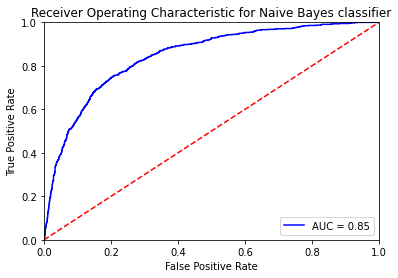

In [88]:
# polt AUC
plt.title('Receiver Operating Characteristic for Naive Bayes classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Classifier 2: SVM






In [89]:
# create the classifer and fit the training data and lables
classifier_svm = svm.SVC(kernel='linear', C=1, probability=True).fit(X_train,y_train)

print("SVM accuracy: %.2f"%classifier_svm.score(X_test, y_test))

SVM accuracy: 0.84


In [90]:
#do a 10 fold cross-validation 
results_svm = cross_val_score(classifier_svm, X,target, cv=10)
print("\n10-fold cross-validation:")
print(results_svm)


10-fold cross-validation:
[0.89267286 0.88957688 0.82024793 0.73966942 0.58057851 0.86673554
 0.88016529 0.87396694 0.86157025 0.8822314 ]


In [91]:
print("The average accuracy of the SVM classifier is : %.2f" % np.mean(results_svm))

The average accuracy of the SVM classifier is : 0.83


In [92]:
print("\nConfusion matrix of the SVM classifier:")
predicted_svm = classifier_svm.predict(X_test)
print(confusion_matrix(y_test,predicted_svm))


Confusion matrix of the SVM classifier:
[[1989  141]
 [ 337  438]]


In [93]:
print("\nClassification_report of SVM classifier:")
print(classification_report(y_test,predicted_svm))


Classification_report of SVM classifier:
              precision    recall  f1-score   support

         0.0       0.86      0.93      0.89      2130
         1.0       0.76      0.57      0.65       775

    accuracy                           0.84      2905
   macro avg       0.81      0.75      0.77      2905
weighted avg       0.83      0.84      0.83      2905



In [94]:
 # classifier = ConfusionMatrixDisplay.from_estimator(classifier_svm, X_test, y_test, display_labels=['negative', 'positive'], cmap=plt.cm.Blues)
    # plt.show()

In [95]:
# calculate the fpr and tpr for all thresholds of the classification
probs = classifier_svm.predict_proba(X_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

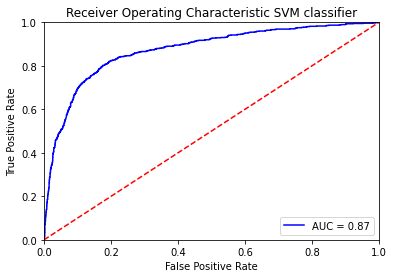

In [96]:
# polt the AUC
plt.title('Receiver Operating Characteristic SVM classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **Balancing the dataframe**

In [97]:
data_df['Sentiment'].value_counts()

0.00000    7097
1.00000    2585
Name: Sentiment, dtype: int64

In [98]:
#number of positive
max_class = len(data_df[data_df['Sentiment']==0]) 
#number of negative
min_class = len(data_df[data_df['Sentiment']==1]) 

In [99]:
positiveRet = data_df[data_df['Sentiment']==0].sample(n = max_class)
negativeRet = data_df[data_df['Sentiment']==1].sample(n = min_class)
balancedData = positiveRet.append(negativeRet)

remain = max_class 
remain = remain - min_class

In [100]:
#duplicate the negative
while remain > 0:
  if remain <=  min_class:
    negativeRet = data_df[data_df['Sentiment']==1].sample(n = remain)
  else:
    negativeRet = data_df[data_df['Sentiment']==1].sample(n = min_class)
  remain = remain - min_class
  balancedData = balancedData.append(negativeRet)

In [101]:
balancedData = balancedData.sample(frac=1).reset_index(drop=True)

In [102]:
balancedData['Sentiment'].value_counts()

0.00000    7097
1.00000    7097
Name: Sentiment, dtype: int64

In [103]:
balancedData.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14194 entries, 0 to 14193
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sentiment   14194 non-null  float64
 1   Clean Text  14194 non-null  object 
dtypes: float64(1), object(1)
memory usage: 221.9+ KB


In [104]:
#for instantiate CountVectorizer()
BcountVec= CountVectorizer()
#for the result word counts for the words
Bword_count_vector=countVec.fit_transform(balancedData["Clean Text"].values.astype('U')) # Stemming not clean text
Bword_count_vector.shape

(14194, 11802)

In [105]:
#Transform a count matrix to a normalized tf-idf 
Btfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
#this for the idf values
Btfidf_transformer.fit(Bword_count_vector)

TfidfTransformer()

In [106]:
# identify the data and the labels
# the independent variable 
Bdata= balancedData['Clean Text'] 
# the dependent variable 
Btarget= balancedData['Sentiment']

In [107]:
# Use TfidfVectorizer for feature extraction (TFIDF to convert textual data to numeric form):
Btf_vec = TfidfVectorizer()
X = Btf_vec.fit_transform(Bdata)
X.shape

(14194, 11802)

In [108]:
# Training Phase
X_train, X_test, y_train, y_test = train_test_split(X, Btarget, test_size=0.30, random_state=0)

In [109]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(9935, 11802) (4259, 11802) (9935,) (4259,)


# Balanced NB

In [110]:
# create the classifer and fit the training data and lables
Bclassifier_nb = MultinomialNB().fit(X_train.todense(),y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [111]:
print(" Balanced MultinomialNB accuracy: %.2f"%Bclassifier_nb.score(X_test.todense(), y_test))

 Balanced MultinomialNB accuracy: 0.83


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [112]:
#do a 10 fold cross-validation 
Bresults_nb = cross_val_score(Bclassifier_nb, X.todense(),Btarget, cv=10)
print("\n Balanced 10-fold cross-validation:")
print(Bresults_nb)
#calcuate the avrage accuracy
print("The average accuracy of the Balanced MultinomialNB classifier is : %.2f" % np.mean(Bresults_nb))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn


 Balanced 10-fold cross-validation:
[0.84295775 0.84577465 0.81197183 0.85211268 0.85482734 0.8111346
 0.84566596 0.84214235 0.82875264 0.84989429]
The average accuracy of the Balanced MultinomialNB classifier is : 0.84


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [113]:
Bpredicted_nb = Bclassifier_nb.predict(X_test.todense())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [114]:
#print confusion matrix
print("\nConfusion matrix of the Balanced MultinomialNB classifier:")
print(confusion_matrix(y_test,Bpredicted_nb))


Confusion matrix of the Balanced MultinomialNB classifier:
[[1769  380]
 [ 343 1767]]


In [115]:
#print Classification report
print("\nClassification_report of Balanced MultinomialNB classifier:")
print(classification_report(y_test,Bpredicted_nb))
print("----------------------------------------------------------------------------")


Classification_report of Balanced MultinomialNB classifier:
              precision    recall  f1-score   support

         0.0       0.84      0.82      0.83      2149
         1.0       0.82      0.84      0.83      2110

    accuracy                           0.83      4259
   macro avg       0.83      0.83      0.83      4259
weighted avg       0.83      0.83      0.83      4259

----------------------------------------------------------------------------


In [116]:
# calculate the fpr and tpr for all thresholds of the classification

Bprobs = Bclassifier_nb.predict_proba(X_test)
Bpreds = Bprobs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, Bpreds)
Broc_auc = metrics.auc(fpr, tpr)

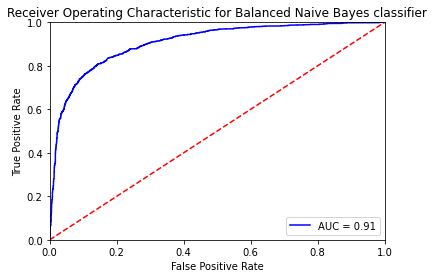

In [117]:
# polt AUC
plt.title('Receiver Operating Characteristic for Balanced Naive Bayes classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % Broc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Balanced SVM

In [118]:
# create the classifer and fit the training data and lables
Bclassifier_svm = svm.SVC(kernel='linear', C=1, probability=True).fit(X_train,y_train)

print("SVM accuracy: %.2f"%Bclassifier_svm.score(X_test, y_test))

SVM accuracy: 0.84


In [119]:
#do a 10 fold cross-validation 
Bresults_svm = cross_val_score(Bclassifier_svm, X,Btarget, cv=10)

print("\n10-fold cross-validation:")
print(Bresults_svm)


10-fold cross-validation:
[0.86338028 0.85774648 0.85422535 0.87042254 0.863284   0.84073291
 0.86680761 0.85200846 0.86257928 0.86751233]


In [120]:
print("The average accuracy of the SVM classifier is : %.2f" % np.mean(Bresults_svm))

The average accuracy of the SVM classifier is : 0.86


In [121]:
print("\nConfusion matrix of the SVM classifier:")
Bpredicted_svm = Bclassifier_svm.predict(X_test)
print(confusion_matrix(y_test,Bpredicted_svm))


Confusion matrix of the SVM classifier:
[[1793  356]
 [ 325 1785]]


In [122]:
print("\nClassification_report of SVM classifier:")
print(classification_report(y_test,Bpredicted_svm))


Classification_report of SVM classifier:
              precision    recall  f1-score   support

         0.0       0.85      0.83      0.84      2149
         1.0       0.83      0.85      0.84      2110

    accuracy                           0.84      4259
   macro avg       0.84      0.84      0.84      4259
weighted avg       0.84      0.84      0.84      4259



In [123]:
# calculate the fpr and tpr for all thresholds of the classification
Bprobs = Bclassifier_svm.predict_proba(X_test)

Bpreds = Bprobs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, Bpreds)
roc_auc = metrics.auc(fpr, tpr)

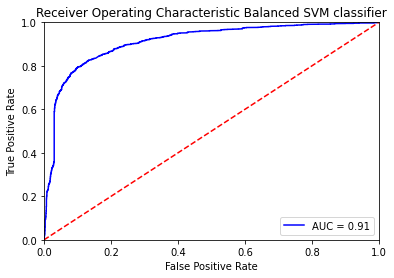

In [124]:
# polt the AUC
plt.title('Receiver Operating Characteristic Balanced SVM classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()